<div class="alert alert-block alert-info">
                                            Regular Expressions
    <p><a href= "https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html">Pandas documentation for text</a>
    <p><a href = 'https://www.analyticsvidhya.com/blog/2014/11/text-data-cleaning-steps-python/'> Analytics Vidhya Data Cleaning</a> 
    <p><a href = 'http://ieva.rocks/2016/08/07/cleaning-text-for-nlp/'> NLP Data Cleaning</a> 
        
</div>

In [1]:
from IPython.display import Audio, Image, YouTubeVideo, Video

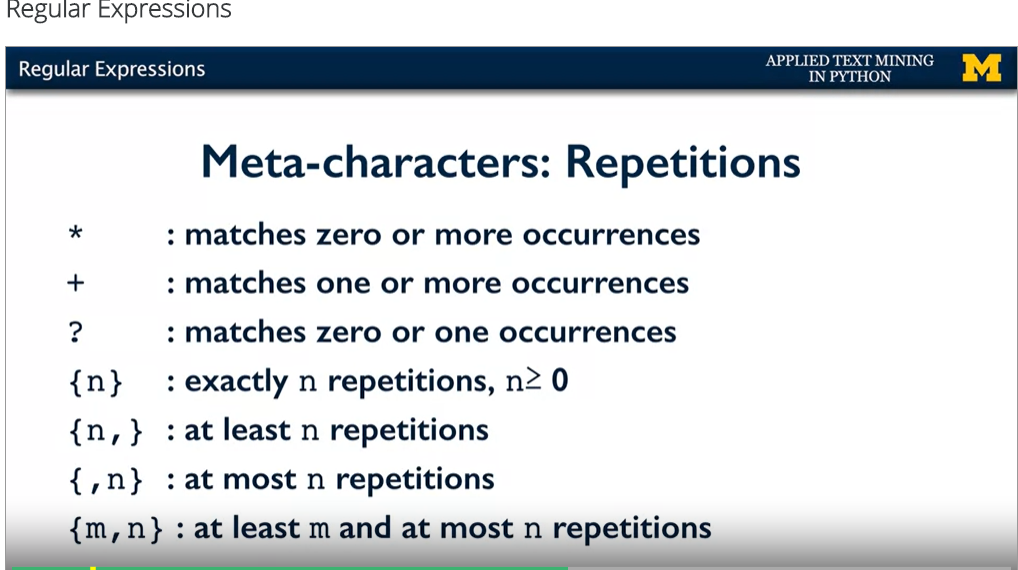

In [2]:
Image('FIG1.PNG', width=700, height=700)

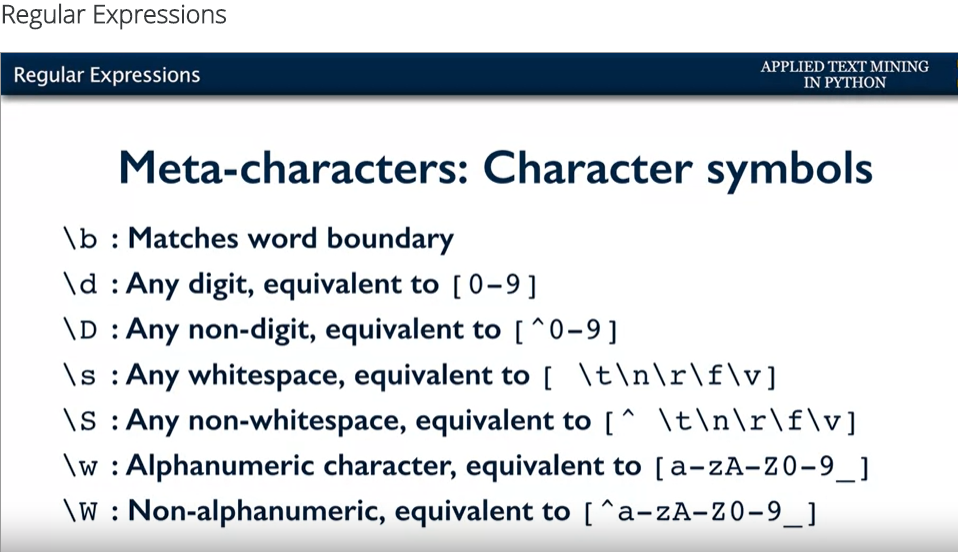

In [3]:
Image('FIG2.PNG', width=700, height=700)


<div class='alert alert-block alert-info'>
<li>[^] ( within [ ] ) is negation in regular expression whereas ^ is "begining of string"</li>

<li>[^a-z] matches any single character that is not from "a" to "z"</li>

<li>^[a-z] means string starts with from "a" to "z"</li>

</div>

# Assignment 1

In this assignment, you'll be working with messy medical data and using regex to extract relevant infromation from the data. 

Each line of the `dates.txt` file corresponds to a medical note. Each note has a date that needs to be extracted, but each date is encoded in one of many formats.

The goal of this assignment is to correctly identify all of the different date variants encoded in this dataset and to properly normalize and sort the dates. 

Here is a list of some of the variants you might encounter in this dataset:
* 04/20/2009; 04/20/09; 4/20/09; 4/3/09
* Mar-20-2009; Mar 20, 2009; March 20, 2009;  Mar. 20, 2009; Mar 20 2009;
* 20 Mar 2009; 20 March 2009; 20 Mar. 2009; 20 March, 2009
* Mar 20th, 2009; Mar 21st, 2009; Mar 22nd, 2009
* Feb 2009; Sep 2009; Oct 2010
* 6/2008; 12/2009
* 2009; 2010

Once you have extracted these date patterns from the text, the next step is to sort them in ascending chronological order accoring to the following rules:
* Assume all dates in xx/xx/xx format are mm/dd/yy
* Assume all dates where year is encoded in only two digits are years from the 1900's (e.g. 1/5/89 is January 5th, 1989)
* If the day is missing (e.g. 9/2009), assume it is the first day of the month (e.g. September 1, 2009).
* If the month is missing (e.g. 2010), assume it is the first of January of that year (e.g. January 1, 2010).
* Watch out for potential typos as this is a raw, real-life derived dataset.

With these rules in mind, find the correct date in each note and return a pandas Series in chronological order of the original Series' indices.

For example if the original series was this:

    0    1999
    1    2010
    2    1978
    3    2015
    4    1985

Your function should return this:

    0    2
    1    4
    2    0
    3    1
    4    3

Your score will be calculated using [Kendall's tau](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient), a correlation measure for ordinal data.

*This function should return a Series of length 500 and dtype int.*

In [4]:
import pandas as pd

doc = []
with open('dates.txt') as file:
    for line in file:
        doc.append(line)

df = pd.Series(doc)
df.iloc[0]

'03/25/93 Total time of visit (in minutes):\n'

In [5]:
pd.set_option('max_colwidth', 200)
pd.set_option('max_rows', 500)



In [6]:
df.shape
df.iloc[0:7]

0                        03/25/93 Total time of visit (in minutes):\n
1                                      6/18/85 Primary Care Doctor:\n
2            sshe plans to move as of 7/8/71 In-Home Services: None\n
3                               7 on 9/27/75 Audit C Score Current:\n
4    2/6/96 sleep studyPain Treatment Pain Level (Numeric Scale): 7\n
5                                   .Per 7/06/79 Movement D/O note:\n
6      4, 5/18/78 Patient's thoughts about current substance abuse:\n
dtype: object

<div class='alert alert-block alert-info'> 
The goal of this assignment is to correctly identify all of the different date variants encoded in this dataset and to properly normalize and sort the dates.
</div>

In [7]:
df = pd.DataFrame(df, columns=['Text'])

In [8]:
df.iloc[0:100]

,Text
0,03/25/93 Total time of visit (in minutes):\n
1,6/18/85 Primary Care Doctor:\n
2,sshe plans to move as of 7/8/71 In-Home Services: None\n
3,7 on 9/27/75 Audit C Score Current:\n
4,2/6/96 sleep studyPain Treatment Pain Level (Numeric Scale): 7\n
5,.Per 7/06/79 Movement D/O note:\n
6,"4, 5/18/78 Patient's thoughts about current substance abuse:\n"
7,10/24/89 CPT Code: 90801 - Psychiatric Diagnosis Interview\n
8,3/7/86 SOS-10 Total Score:\n
9,(4/10/71)Score-1Audit C Score Current:\n


In [9]:
df = df.assign(text_contains_month = df['Text'].str.contains('Mar'))

In [10]:
df[df['text_contains_month']]

,Text,text_contains_month
108,"PET Scan (DPSH 5/04/74): 1) Marked hypometabolism involving the bilateral caudate nuclei. This is a non-specific finding, although this raises the question of a multisystem atrophy, specifically M...",True
127,see above and APS eval of 26 May 1982 Social History Marital Status: Single\n,True
150,12 March 1980 SOS-10 Total Score:\n,True
154,06 Mar 1974 Primary Care Doctor:\n,True
162,dON 05 Mar 1974\n,True
185,see 17 Aug 1985 eval by Dr. Ngo.Social History Marital Status: Married\n,True
188,12 March 2004 CPT Code: 90801 - Psychiatric Diagnosis Interview\n,True
204,"Mar. 10, 1976 CPT Code: 90791: No medical services\n",True
287,.The patient reports onset of depressed mood SINCE ~6 MONTHS s/p liver transplant in Mar 2010 associated with:\n,True
289,NV fire fighter died Sep 2007 while working. Was friend from deployment to San Marino and trainings for years prior. Still troubling to pt. Didn't go to his funeral. Spiritual/Religion:\n,True


### List of variations

<div class='alert alert-block alert-info'>
<li> 04/20/2009; 04/20/09; 4/20/09; 4/3/09</li>
<li> Mar-20-2009; Mar 20, 2009; March 20, 2009; Mar. 20, 2009; Mar 20 2009;</li>
<li> 20 Mar 2009; 20 March 2009; 20 Mar. 2009; 20 March, 2009</li>
<li> Mar 20th, 2009; Mar 21st, 2009; Mar 22nd, 2009</li>
<li> Feb 2009; Sep 2009; Oct 2010</li>
<li> 6/2008; 12/2009</li>
<li> 2009; 2010</li>
</div>    








In [11]:
Video("RegEx.mp4", width=400, height=400)

<div class='alert alert-block alert-success'>
Check for dates with all three components
    <li> 04/20/2009; 04/20/09; 4/20/09; 4/3/09</li>
</div>


In [ ]:
df_date_extracted = df['Text'].str.extractall(r'(?P<FullDate>(?P<Month>\d?\d)/(?P<Day>\d?\d)/(?P<Year>\d?\d?\d\d))')



#Check for four digit dates
#df_date_extracted[df_date_extracted['Year'].str.len() == 4]

#Check for two digit dates
#df_date_extracted[df_date_extracted['Year'].str.len() == 2]
#check for year equal to three digits
df_date_extracted[(df_date_extracted['Year'].str.len() == 3)]
#72	1	9/36/308	9	36	

# This is the CBC count and so drop these
df[df['Text'].str.contains('9/36/308')]

#Remove  if dates year is NOT 2 digits or is not 4 digits
df_date_extracted_daymonth_year = df_date_extracted[(df_date_extracted['Year'].str.len() == 2) | (df_date_extracted['Year'].str.len() == 4)]



In [ ]:
df_date_extracted_daymonth_year

<div class='alert alert-block alert-success'>
Check for dates with only two of the three components
<li>6/2008; 12/2009 </li>
<li> Does not start with one or two digits, but has month with one or two digits and years with four digits </li>    
</div>

In [ ]:
df_date_extracted_month_year = df['Text'].str.extractall(r'(?P<FullDate>(?P<Month>^[\d?\d]\d?\d)/(?P<Year>\d\d\d\d)\b)')


In [ ]:
df_date_extracted_month_year['Day'] = '01'

In [ ]:
df_date_extracted_month_year

<div class='alert alert-block alert-success'>
Check for dates with only year
<li>2008; 2009 </li>
<li> Word boundary followed by year </li>    
</div>

In [ ]:
df_date_extracted_just_year = df['Text'].str.extractall(r'[ ]+(?P<Year>\d{4,4})\b')

In [ ]:
df_date_extracted_just_year = df_date_extracted_just_year.assign(Day=1, Month=1) # 251
#df[df['Text'].str.contains('\\b'9079', regex=True)



In [ ]:
df_date_extracted_just_year

<div class='alert alert-block alert-success'>
Looking for months spelled out    
<li> Mar-20-2009; Mar 20, 2009; March 20, 2009; Mar. 20, 2009; Mar 20 2009; </li>
</div>    

In [18]:
from calendar import month_name

patternlist =  ["(" + a[0:3]+"(" + a[3:] + "|.)?,?)" if len(a) > 3 else a for a in month_name ]
patternlist = patternlist[1:]
totalpattern = "|".join(patternlist) 
#print(patternlist)
print(totalpattern)



(Jan(uary|.)?,?)|(Feb(ruary|.)?,?)|(Mar(ch|.)?,?)|(Apr(il|.)?,?)|May|(Jun(e|.)?,?)|(Jul(y|.)?,?)|(Aug(ust|.)?,?)|(Sep(tember|.)?,?)|(Oct(ober|.)?,?)|(Nov(ember|.)?,?)|(Dec(ember|.)?,?)


In [19]:
df_date_extracted_with_monthnames = df['Text'].str.extractall(r'(?P<FullDate>(?P<Month>(Jan(uary|.)?,?)|(Feb(ruary|.)?,?)|(Mar(ch|.)?,?)|(Apr(il|.)?,?)|May|(Jun(e|.)?,?)|(Jul(y|.)?,?)|(Aug(ust|.)?,?)|(Sep(tember|.)?,?)|(Oct(ober|.)?,?)|(Nov(ember|.)?,?)|(Dec(ember|.)?,?))[\s-](?P<Day>\d?\d,?)?[\s-](?P<Year>\d\d\d\d))')


In [ ]:
#dUPLICATE CELL
df_date_extracted_with_monthnames = df['Text'].str.extractall(r'(?P<FullDate>(?P<Month>(Mar(ch|.)?,?))[\s-](?P<Day>\d?\d,?)?[\s-](?P<Year>\d\d\d\d))')


In [ ]:
#df_date_extracted_with_monthnames = df['Text'].str.extractall(r'(?P<FullDate>(?P<Day>\d?\d)? (?P<Month>January|February|March|April|May|June|July|August|September|October|November|December|Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec[,]?)? (?P<Year>\d\d\d\d))')


In [ ]:
df_date_extracted_with_monthnames.shape #(164, 3)

df_date_extracted_with_monthnames

In [ ]:
#print(df.iloc[127])
print(df.iloc[338])

In [ ]:
df_date_extracted_with_monthlongyear = df['Text'].str.extractall(r'(?P<FullDate>(?P<Month>January|February|March|April|May|June|July|August|September|October|November|December|Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec[,\.]?)? (?P<Year>\d\d\d\d))')


In [ ]:
import re
m = re.search(r'(?P<FullDate>(?P<Month>January|February|March[,\.]?|April[,\.]?)? (?P<Year>\d\d\d\d))', 'Get this March, 2008')
m.group(0)





In [ ]:
import re
m = re.search(r'(?P<FullDate>(?P<Month>January|February|March|April|May|June|July|August|September|October|November|December|Jan|Feb|Mar|Apr[,\.]?)? (?P<Year>\d\d\d\d))', 'Get this Apr, 2008')
m.group(0)


In [ ]:
def date_sorter():
    
    # Your code here
    
    return # Your answer here

In [ ]:
import pandas as pd

time_sentences = ["Monday: The doctor's appointment is at 2:45pm.", 
                  "Tuesday: The dentist's appointment is at 11:30 am.",
                  "Wednesday: At 7:00pm, there is a basketball game!",
                  "Thursday: Be back home by 11:15 pm at the latest.",
                  "Friday: Take the train at 08:10 am, arrive at 09:00am."]

df = pd.DataFrame(time_sentences, columns=['text'])
df

####  Find the number of characters for each string in df['text']

In [ ]:

df = df.assign(text_length = df['text'].apply(len))

#### Find the number of tokens for each string in df['text']

In [ ]:

# df.assign(split_text = df['text'].str.split())
df_expanded = df['text'].str.split(expand=True)

df_expanded


####  Find which entries contain the word 'appointment'

In [ ]:
df = df.assign(text_contains_appointment = df['text'].str.contains('appointment'))

####  Find how many times a digit occurs in each string

<div class="alert alert-block alert-success">
<h5>Two methods shown - One gets the count of digits and the other uses a powerful function "enumerate" to loop through the string . It allows us to loop over something and have an automatic counter.</h5>
</div>

In [ ]:
df = df.assign(contains_digits = df['text'].str.count(r'\d'))

In [ ]:
def indexOfDigit(text):
    return ({c: i  for i, c in enumerate(text) if c.isdigit()})
    
df['text'].apply(indexOfDigit)

####  Find all occurances of the digits

In [ ]:

df['text'].str.findall(r'\d')

![alt Regexp](FIG3.png "Title")



In [ ]:
# group and find the hours and minutes
df['text'].str.findall(r'(\d?\d):(\d?\d)')

In [ ]:
# replace weekdays with '???'
df['text'].str.replace(r'\w+day\b', '???')

In [ ]:
# replace weekdays with 3 letter abbrevations
df['text'].str.replace(r'(\w+day\b)', lambda x: x.groups()[0][:3])

In [ ]:
# create new columns from first match of extracted groups
df['text'].str.extract(r'(\d?\d):(\d\d)')

In [ ]:
# extract the entire time, the hours, the minutes, and the period
df['text'].str.extractall(r'((\d?\d):(\d\d) ?([ap]m))')

In [ ]:
# extract the entire time, the hours, the minutes, and the period with group names
df['text'].str.extractall(r'(?P<time>(?P<hour>\d?\d):(?P<minute>\d\d) ?(?P<period>[ap]m))')

Adding a new cell